## Linear Regression
Ref: Gavin Hackeling, Mastering Machine Learning with scikit-learn, 2014

### Simple Linear Regression

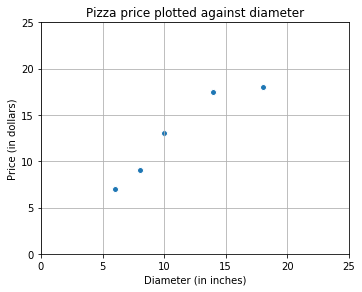

In [1]:
# 预测不同尺寸Pizza价格
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 已知的Pizza价格和尺寸的数据
X = [6, 8, 10, 14, 18]
y = [7, 9, 13, 17.5, 18]
# 将列表转换为dataframe
pizza_train_data = pd.DataFrame([X,y], index=['Diameter (in inches)', 'Price (in dollars)']).T
sns.pairplot(x_vars='Diameter (in inches)', y_vars='Price (in dollars)', data=pizza_train_data, size=4, aspect=1.3)
plt.title('Pizza price plotted against diameter')
plt.axis([0, 25, 0, 25])
plt.grid()
sns.despine(top=False, right=False)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

# sklearn的线性模型是需要矩阵输入，所以需要reshape
X_train = pizza_train_data['Diameter (in inches)'].reshape(-1,1)
y_train = pizza_train_data['Price (in dollars)']
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
print(model_1.coef_)
print(model_1.intercept_)
print('A 12" pizza price should be: $%.2f' %model_1.predict(12))

[ 0.9762931]
1.96551724138
A 12" pizza price should be: $13.68


R-squared: 0.66
RMSE: 1.96


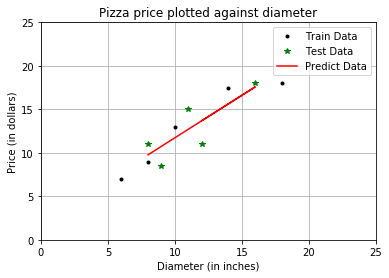

In [3]:
from sklearn.metrics import mean_squared_error

X = [8, 9, 11, 16, 12]
y = [11, 8.5, 15, 18, 11]
pizza_test_data = pd.DataFrame([X,y], index=['Diameter (in inches)', 'Price (in dollars)']).T 

X_test = pizza_test_data['Diameter (in inches)'].reshape(-1,1)
y_test = pizza_test_data['Price (in dollars)']

y_predict = model_1.predict(X_test)
score = model_1.score(X_test, y_test)
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print('R-squared: %.2f' %score) 
print('RMSE: %.2f' %rmse)

plt.figure()
plt.title('Pizza price plotted against diameter')
plt.plot(X_train, y_train, 'k.', label='Train Data')
plt.plot(X_test, y_test, 'g*', label='Test Data')
plt.plot(X_test, y_predict, 'r', label='Predict Data')
plt.axis([0, 25, 0, 25])
plt.xlabel('Diameter (in inches)')
plt.ylabel('Price (in dollars)')
plt.grid()
plt.legend()
plt.show()

### Multiple Linear Regression

In [4]:
# 数据增加了第二列：Pizza的配料数目
X = [[6, 2], [8, 1], [10, 0], [14, 2], [18, 0]]
y = [7, 9, 13, 17.5, 18]
X_train_2 = pd.DataFrame(X, columns=['Diameter (in inches)', 'Number of toppings'])
y_train_2 = y

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

X = [[8, 2], [9, 0], [11, 2], [16, 2], [12, 0]]
y = [[11], [8.5], [15], [18], [11]]
X_test_2 = pd.DataFrame(X, columns=['Diameter (in inches)', 'Number of toppings'])
y_test_2 = y

y_predict_2 = model_2.predict(X_test_2)
for i, pred in enumerate(y_predict_2):
    print('Predicted price: %s, Real Price: %s' %(pred, y_test_2[i]))

score = model_2.score(X_test_2, y_test_2)
mse = mean_squared_error(y_test_2, y_predict_2)
rmse = np.sqrt(mse)
print('R-squared: %.2f' %score) 
print('RMSE: %.2f' %rmse)

Predicted price: 10.0625, Real Price: [11]
Predicted price: 10.28125, Real Price: [8.5]
Predicted price: 13.09375, Real Price: [15]
Predicted price: 18.1458333333, Real Price: [18]
Predicted price: 13.3125, Real Price: [11]
R-squared: 0.77
RMSE: 1.62


### Polynomial Regression

X_train_3:
 [[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   10.  100.]
 [   1.   14.  196.]
 [   1.   18.  324.]]
X_test_3:
 [[   1.    6.   36.]
 [   1.    8.   64.]
 [   1.   11.  121.]
 [   1.   16.  256.]]


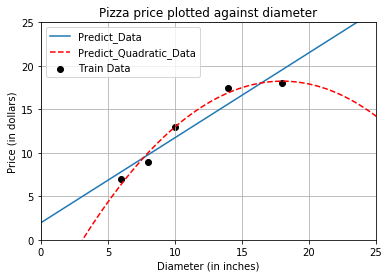

R-squared: 0.87
RMSE: 1.35


In [5]:
from sklearn.preprocessing import PolynomialFeatures

pizza_train_data = pd.DataFrame({'Diameter (in inches)': [6, 8, 10, 14, 18],
                          'Price (in dollars)': [7, 9, 13, 17.5, 18],
                         })
pizza_test_data = pd.DataFrame({'Diameter (in inches)': [6, 8, 11, 16],
                          'Price (in dollars)': [8, 12, 15, 18]
                         })

X_train_3 = pizza_train_data['Diameter (in inches)'].reshape(-1,1)
y_train_3 = pizza_train_data['Price (in dollars)']
X_test_3 = pizza_test_data['Diameter (in inches)'].reshape(-1,1)
y_test_3 = pizza_test_data['Price (in dollars)'] 

# 简单一次线性回归
model_3 = LinearRegression()
model_3.fit(X_train_3, y_train_3)
xx = np.linspace(0, 26, 100).reshape(-1,1)
yy = model_3.predict(xx.reshape(-1,1))
plt.plot(xx, yy, label='Predict_Data')

# 二项式线性回归，需要对输入数据进行相应变换
# y=a+b1*x+b2*x*x
'''
fit_transform(traindata)对部分数据先拟合fit，找到该part的整体指标，如均值、方差、最大值最小值等等（根据具体转换的目的），
然后对该traindata进行转换transform，从而实现数据的标准化、归一化等等。。
根据对之前部分fit的整体指标，对剩余的数据（testdata）使用同样的均值、方差、最大最小值等指标进行转换transform(testdata)，
从而保证traindata、testdata处理方式相同。
必须先用fit_transform(traindata)，之后再transform(testdata)，如果直接transform(traindata)，程序会报错
如果fit_transfrom(traindata)后，使用fit_transform(testdata)而不用transform(testdata)，虽然也能归一化，但是两个结果不是在同一个“标准”下的，
具有明显差异。
参考：http://m.blog.csdn.net/anecdotegyb/article/details/74857055
'''
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_3_quadratic = quadratic_featurizer.fit_transform(X_train_3)
X_test_3_quadratic = quadratic_featurizer.transform(X_test_3)
print('X_train_3:\n', X_train_3_quadratic)
print('X_test_3:\n', X_test_3_quadratic)

model_3_quadratic = LinearRegression()
model_3_quadratic.fit(X_train_3_quadratic, y_train_3)
xx_quadratic = quadratic_featurizer.fit_transform(xx)
yy_quadratic = model_3_quadratic.predict(xx_quadratic)

y_predict_3_quadratic = model_3_quadratic.predict(X_test_3_quadratic)

# 二项式线性回归曲线（注意这里x轴取值是xx二不是xx_quadratic））
plt.plot(xx, yy_quadratic, c='r', ls='--', label='Predict_Quadratic_Data')
# 原始训练数据散点图
plt.scatter(X_train_3, y_train_3, c='k', label='Train Data')
plt.title('Pizza price plotted against diameter')
plt.axis([0, 25, 0, 25])
plt.xlabel('Diameter (in inches)')
plt.ylabel('Price (in dollars)')
plt.grid()
plt.legend()
plt.show()

score = model_3_quadratic.score(X_test_3_quadratic, y_test_3)
mse = mean_squared_error(y_test_3, y_predict_3_quadratic)
rmse = np.sqrt(mse)
print('R-squared: %.2f' %score) 
print('RMSE: %.2f' %rmse)

0.809726797708
0.867544365635
0.835692415604
0.809588079586
0.782128610968
0.696007790924
0.491984605687
0.147957797273
-0.094356667043


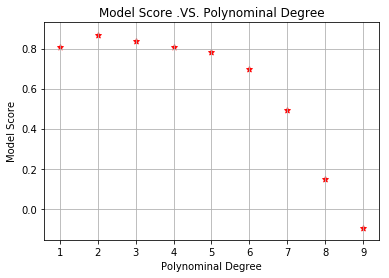

In [6]:
# 对不同多项式次数模型的分析，在次数为2时，模型score最高，随着次数增加，score逐渐降低，出现过拟合情况

def polynominal_model(degree, X_train, y_train, X_test, y_test):
    polynominal_featurizer = PolynomialFeatures(degree=degree)
    X_train_polynominal = polynominal_featurizer.fit_transform(X_train)
    X_test_polynominal = polynominal_featurizer.transform(X_test)
#     print('X_train_polynominal:\n', X_train_polynominal)
#     print('X_test_polynominal:\n', X_test_polynominal)

    model_polynominal = LinearRegression()
    model_polynominal.fit(X_train_polynominal, y_train)
    xx_polynominal = polynominal_featurizer.fit_transform(xx)
    yy_polynominal = model_polynominal.predict(xx_polynominal)

    y_predict_polynominal = model_polynominal.predict(X_test_polynominal)
    score = model_polynominal.score(X_test_polynominal, y_test)
    print(score)
    return score

degree = np.arange(1,10)
scorelist = []
for deg in degree:
    score = polynominal_model(deg, X_train_3, y_train_3, X_test_3, y_test_3)
    scorelist.append(score)

plt.scatter(degree, scorelist, marker='*', c='r')
plt.title('Model Score .VS. Polynominal Degree')
plt.xlabel('Polynominal Degree')
plt.ylabel('Model Score')
plt.grid()
plt.show()